In [12]:
import pandas as pd
import numpy as np
import os 

In [13]:
wines = pd.read_csv("winequality-red.csv")

In [14]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [15]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [16]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

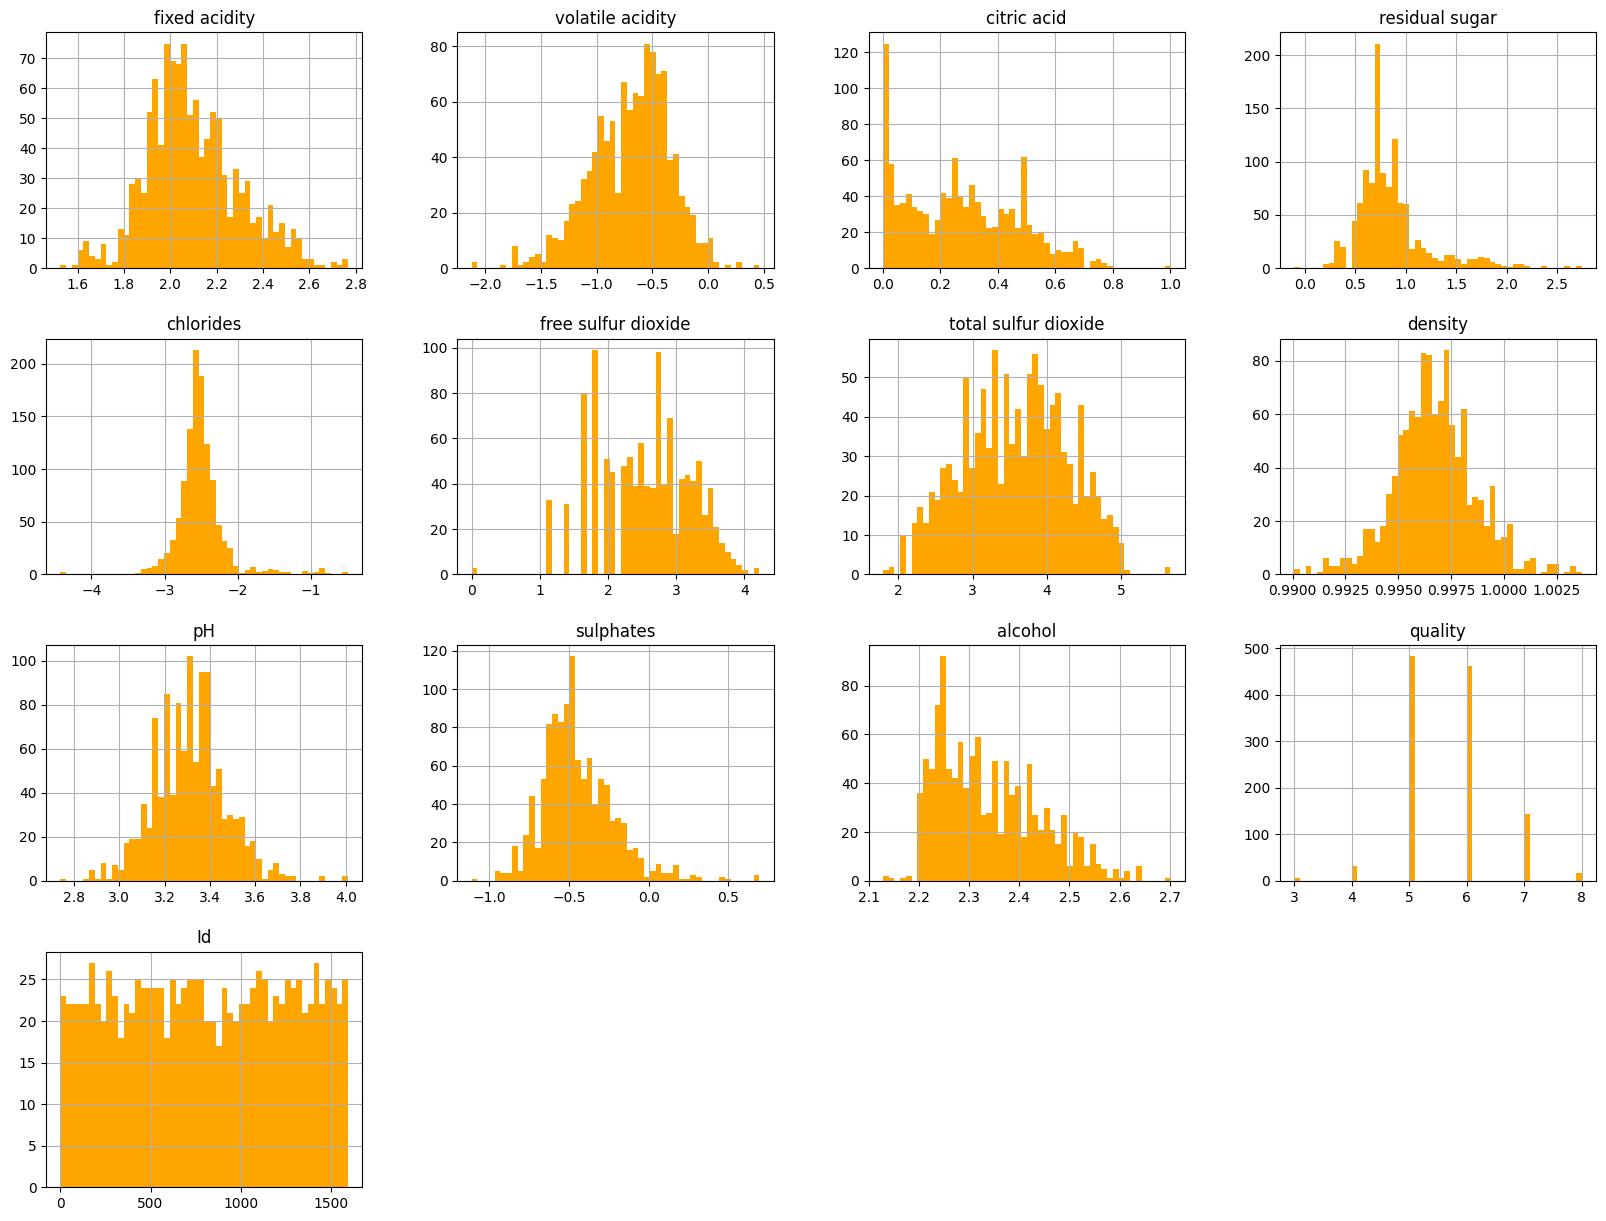

In [53]:
import matplotlib.pyplot as plt
wines.hist(bins=50,figsize=(20,15),color="orange")

fixed acidity:0.41653242184430117


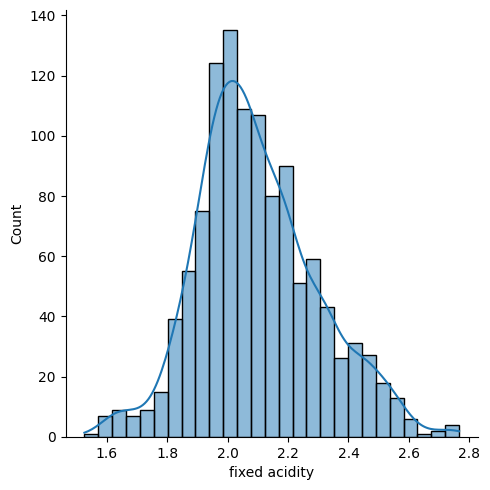

volatile acidity:-0.4412402604700223


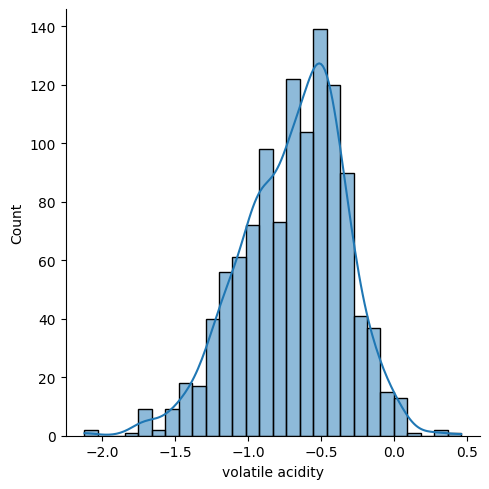

citric acid:0.3710729929318701


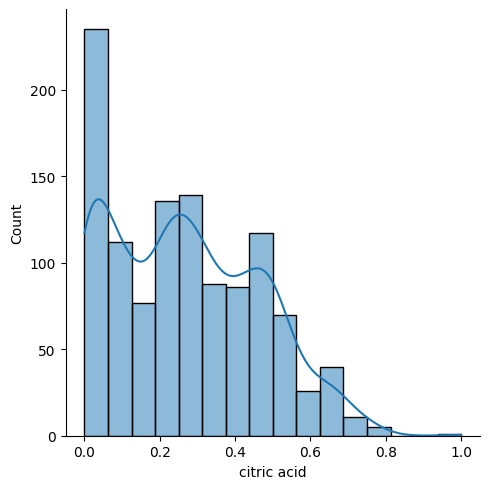

residual sugar:1.738751513956744


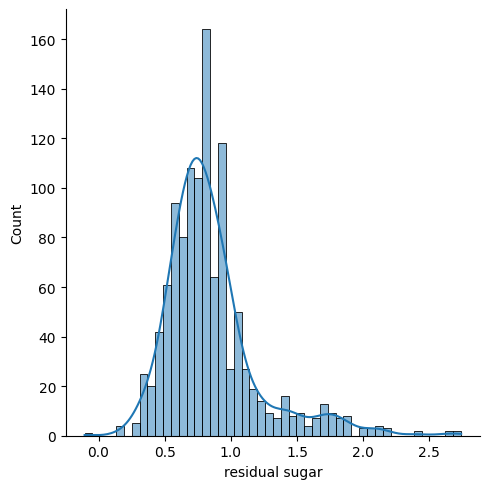

chlorides:1.6301932153870087


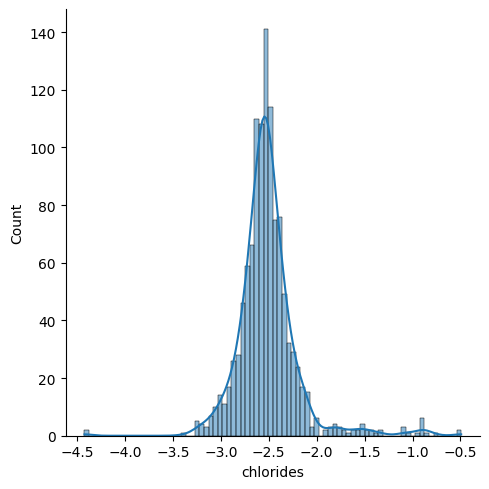

free sulfur dioxide:-0.23712809595806253


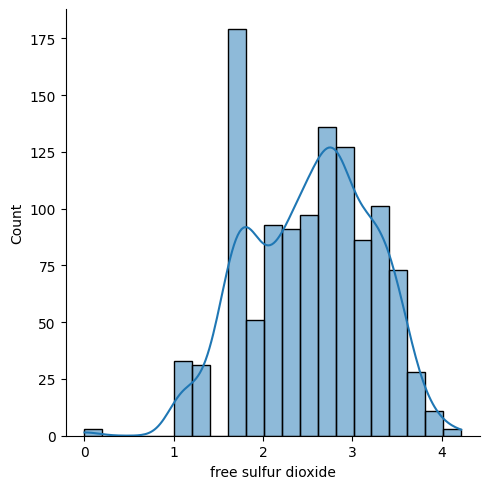

total sulfur dioxide:-0.03937696952011918


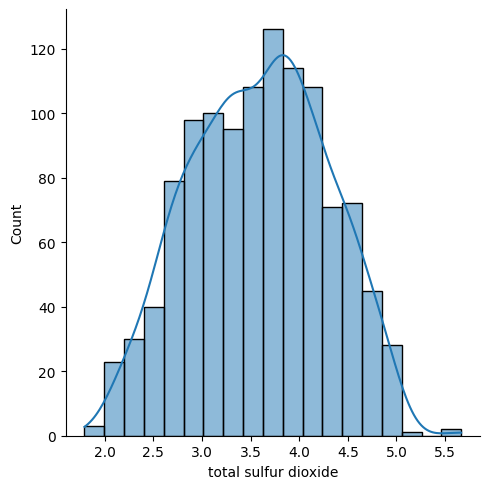

density:0.10226068292206784


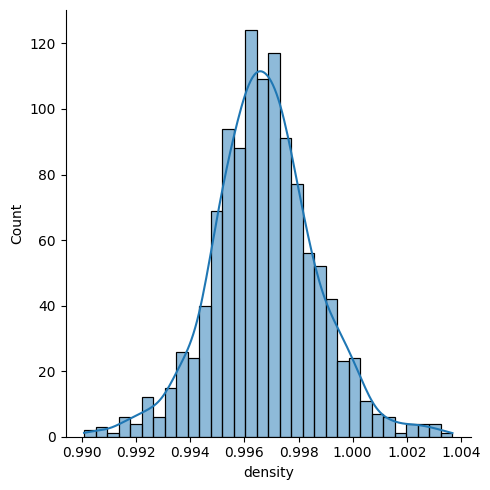

pH:0.22084807837665207


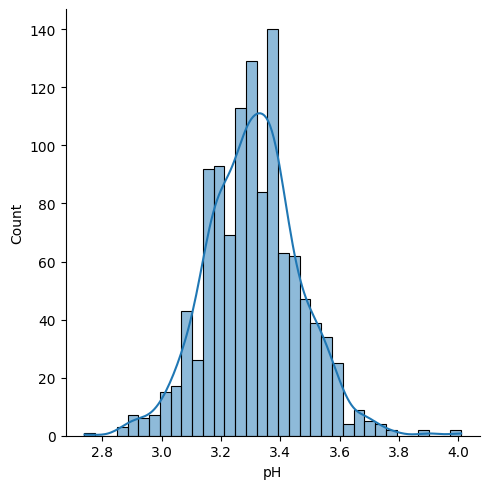

sulphates:0.9774028180134251


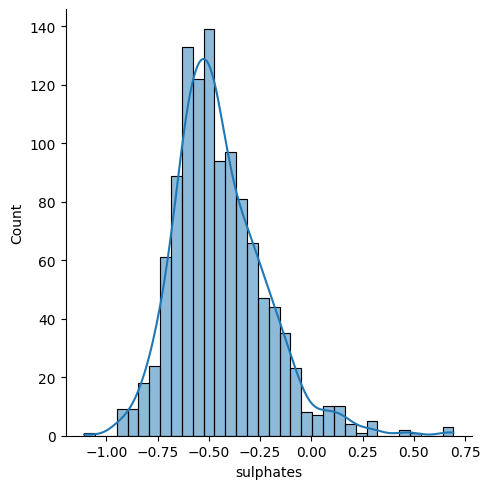

alcohol:0.6592436563882428


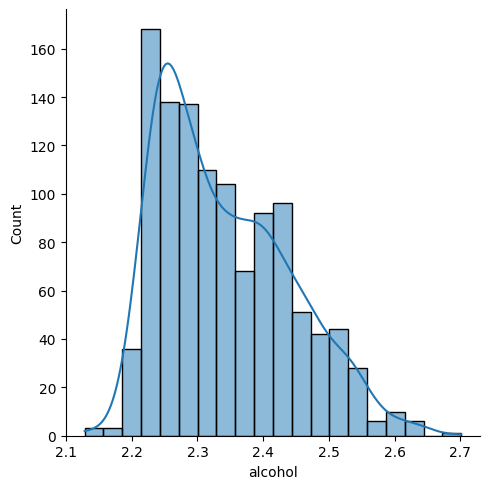

quality:0.2864151961088048


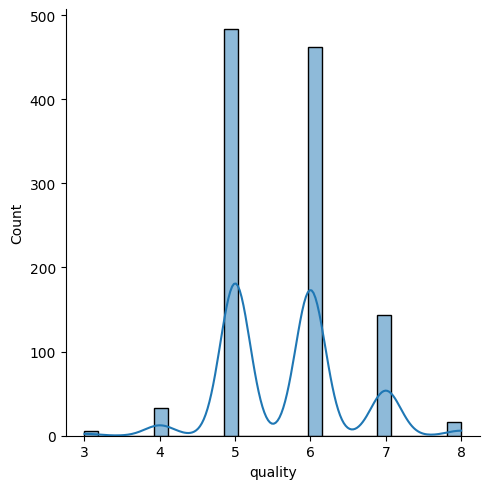

Id:-0.010405535902206199


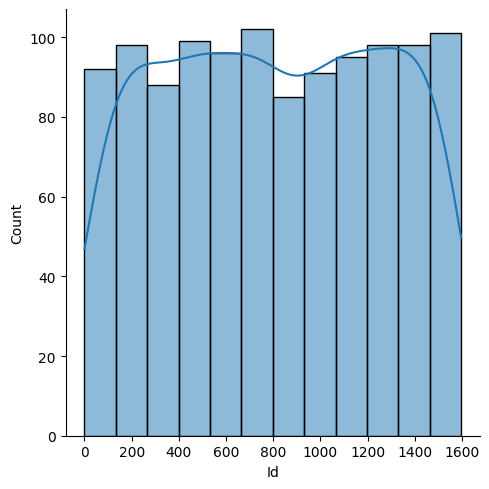

In [23]:
from scipy.stats import skew
import seaborn as sns
for col in wines:
    print(f"{col}:{skew(wines[col])}")
    sns.displot(wines[col],kde=True)
    plt.show()

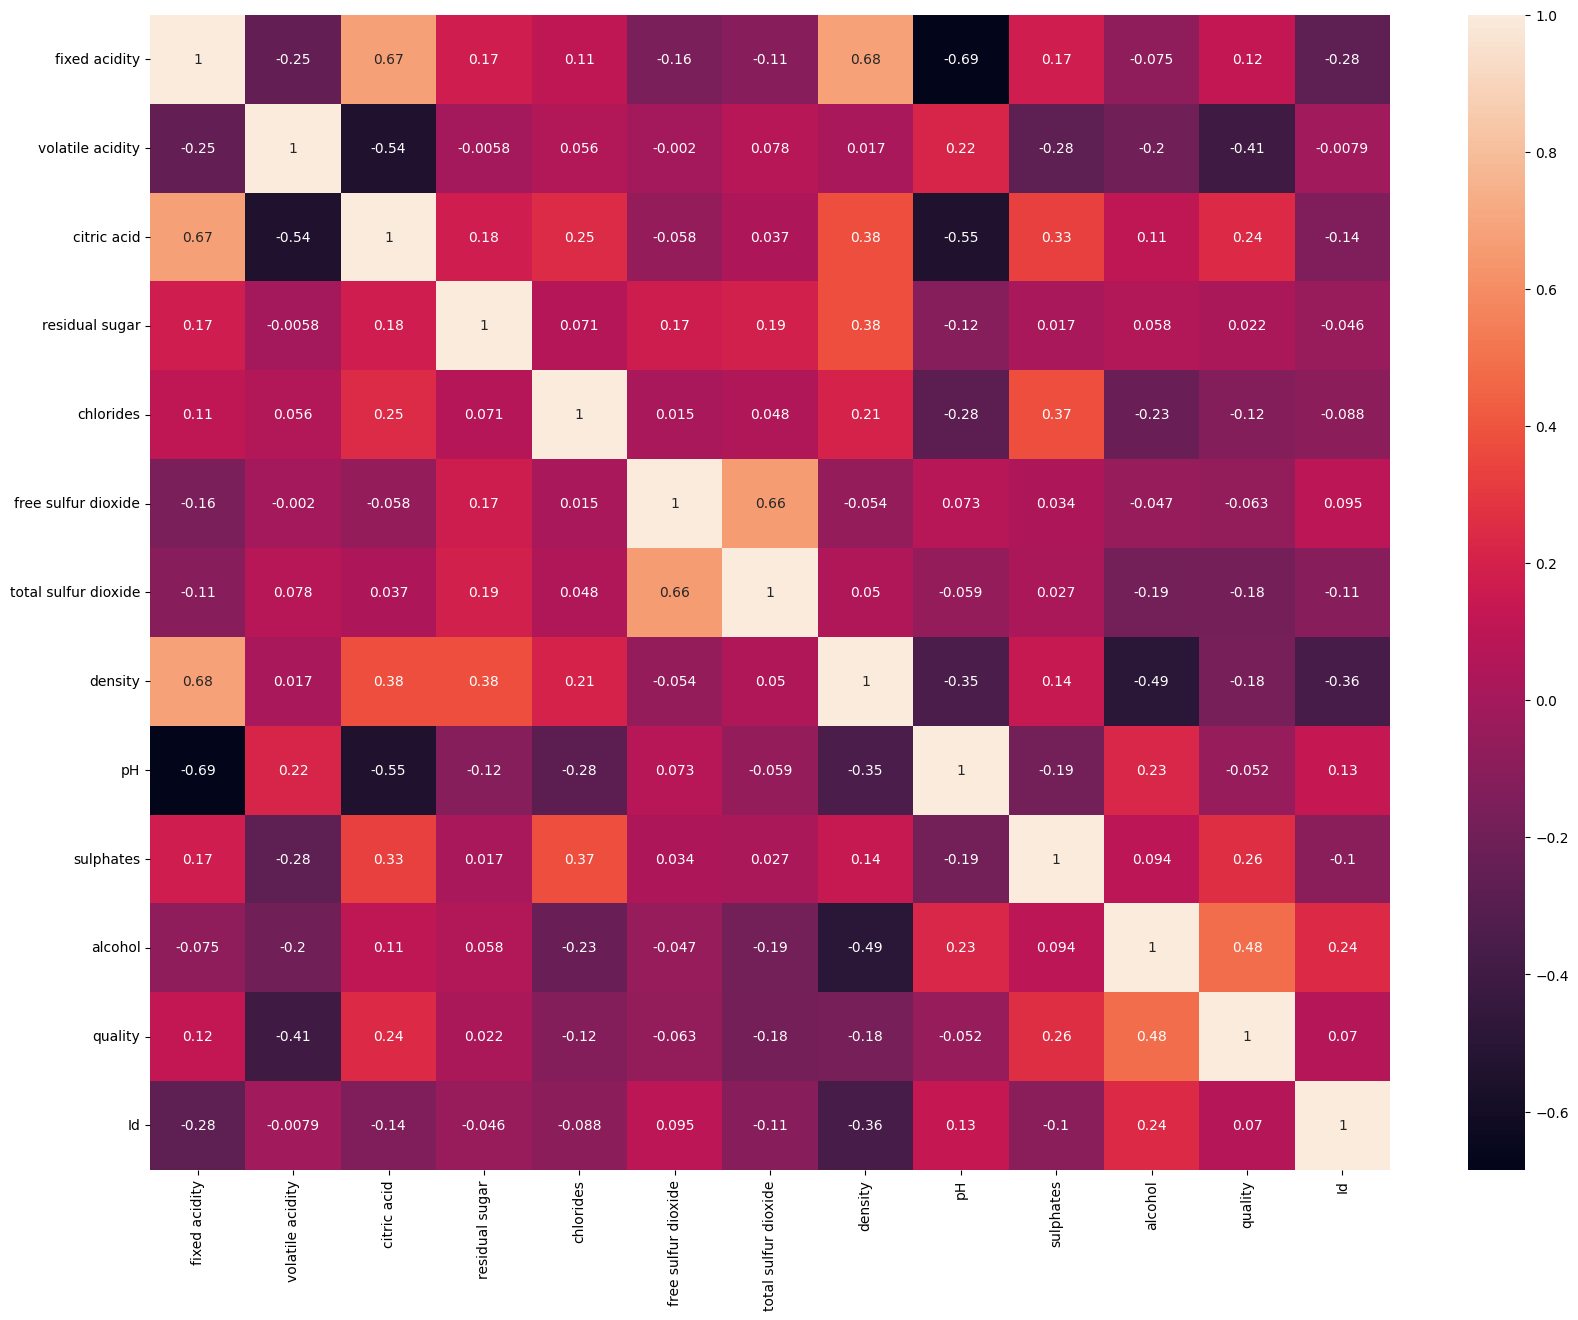

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(wines.corr(),annot=True)
plt.show()

In [20]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [21]:
##to remove skewness
#fixed acidity 
#volatile acidity
# residual sugar
# chlorides 
#free sulfur dioxide
#total sulfur dioxide
# sulphates
# alcohol
columns_to_transform=['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

wines[columns_to_transform] = wines[columns_to_transform].apply(np.log)

In [22]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5,0
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,5,1
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,5,2
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,6,3
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5,4


In [33]:
X=wines.drop(['quality','Id'],axis=1)
y=wines['quality']

In [34]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710


In [35]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
print(f"x_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")

x_train shape:(914, 11)
y_train shape:(914,)
x_test shape:(229, 11)
y_test shape:(229,)


In [43]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(x_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [44]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score

In [45]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    
    return rmse,mae,r2

In [46]:
predicted = lr.predict(x_test)

In [47]:
eval_metrics(y_test,predicted)

(np.float64(0.7033499047302807),
 np.float64(0.5915550086710358),
 0.11100610714843362)

In [48]:
from sklearn.linear_model import LinearRegression as lreg
lr2=lreg()
lr2.fit(x_train,y_train)

LinearRegression()

In [49]:
predicted2 = lr2.predict(x_test)
eval_metrics(y_test,predicted2)

(np.float64(0.6022658536788991),
 np.float64(0.4623866302280915),
 0.34817292864451965)

In [51]:
import xgboost as xgb
# Initialize the XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
# Train the XGBoost model on the training data
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
predicted3=xg_reg.predict(x_test)
eval_metrics(y_test,predicted3)

(np.float64(0.5769379724829292),
 np.float64(0.4513671429396717),
 0.40184444189071655)